Loaded data for time step 0 with shape: (64000, 8)
Mean properties at time step 0:
Mean Radius: 1.0578
Mean Velocity: 0.6478
Mean Kinetic Energy: 0.7682
Mean Mass: 0.0000
Loaded data for time step 100 with shape: (63997, 8)
Mean properties at time step 100:
Mean Radius: 1.0645
Mean Velocity: 0.6474
Mean Kinetic Energy: 0.7706
Mean Mass: 0.0000
Loaded data for time step 200 with shape: (63995, 8)
Mean properties at time step 200:
Mean Radius: 1.0691
Mean Velocity: 0.6484
Mean Kinetic Energy: 0.7660
Mean Mass: 0.0000
Loaded data for time step 300 with shape: (63993, 8)
Mean properties at time step 300:
Mean Radius: 1.0792
Mean Velocity: 0.6476
Mean Kinetic Energy: 0.7681
Mean Mass: 0.0000
Loaded data for time step 400 with shape: (63992, 8)
Mean properties at time step 400:
Mean Radius: 1.0849
Mean Velocity: 0.6483
Mean Kinetic Energy: 0.7688
Mean Mass: 0.0000
Loaded data for time step 500 with shape: (63990, 8)
Mean properties at time step 500:
Mean Radius: 1.0946
Mean Velocity: 0.6469


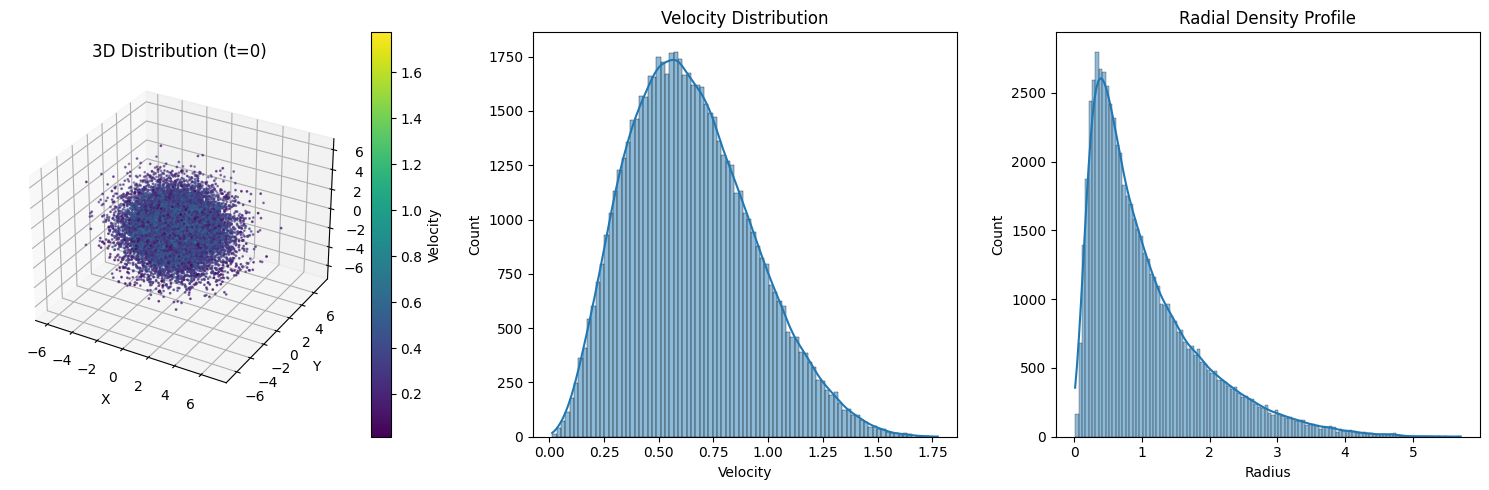

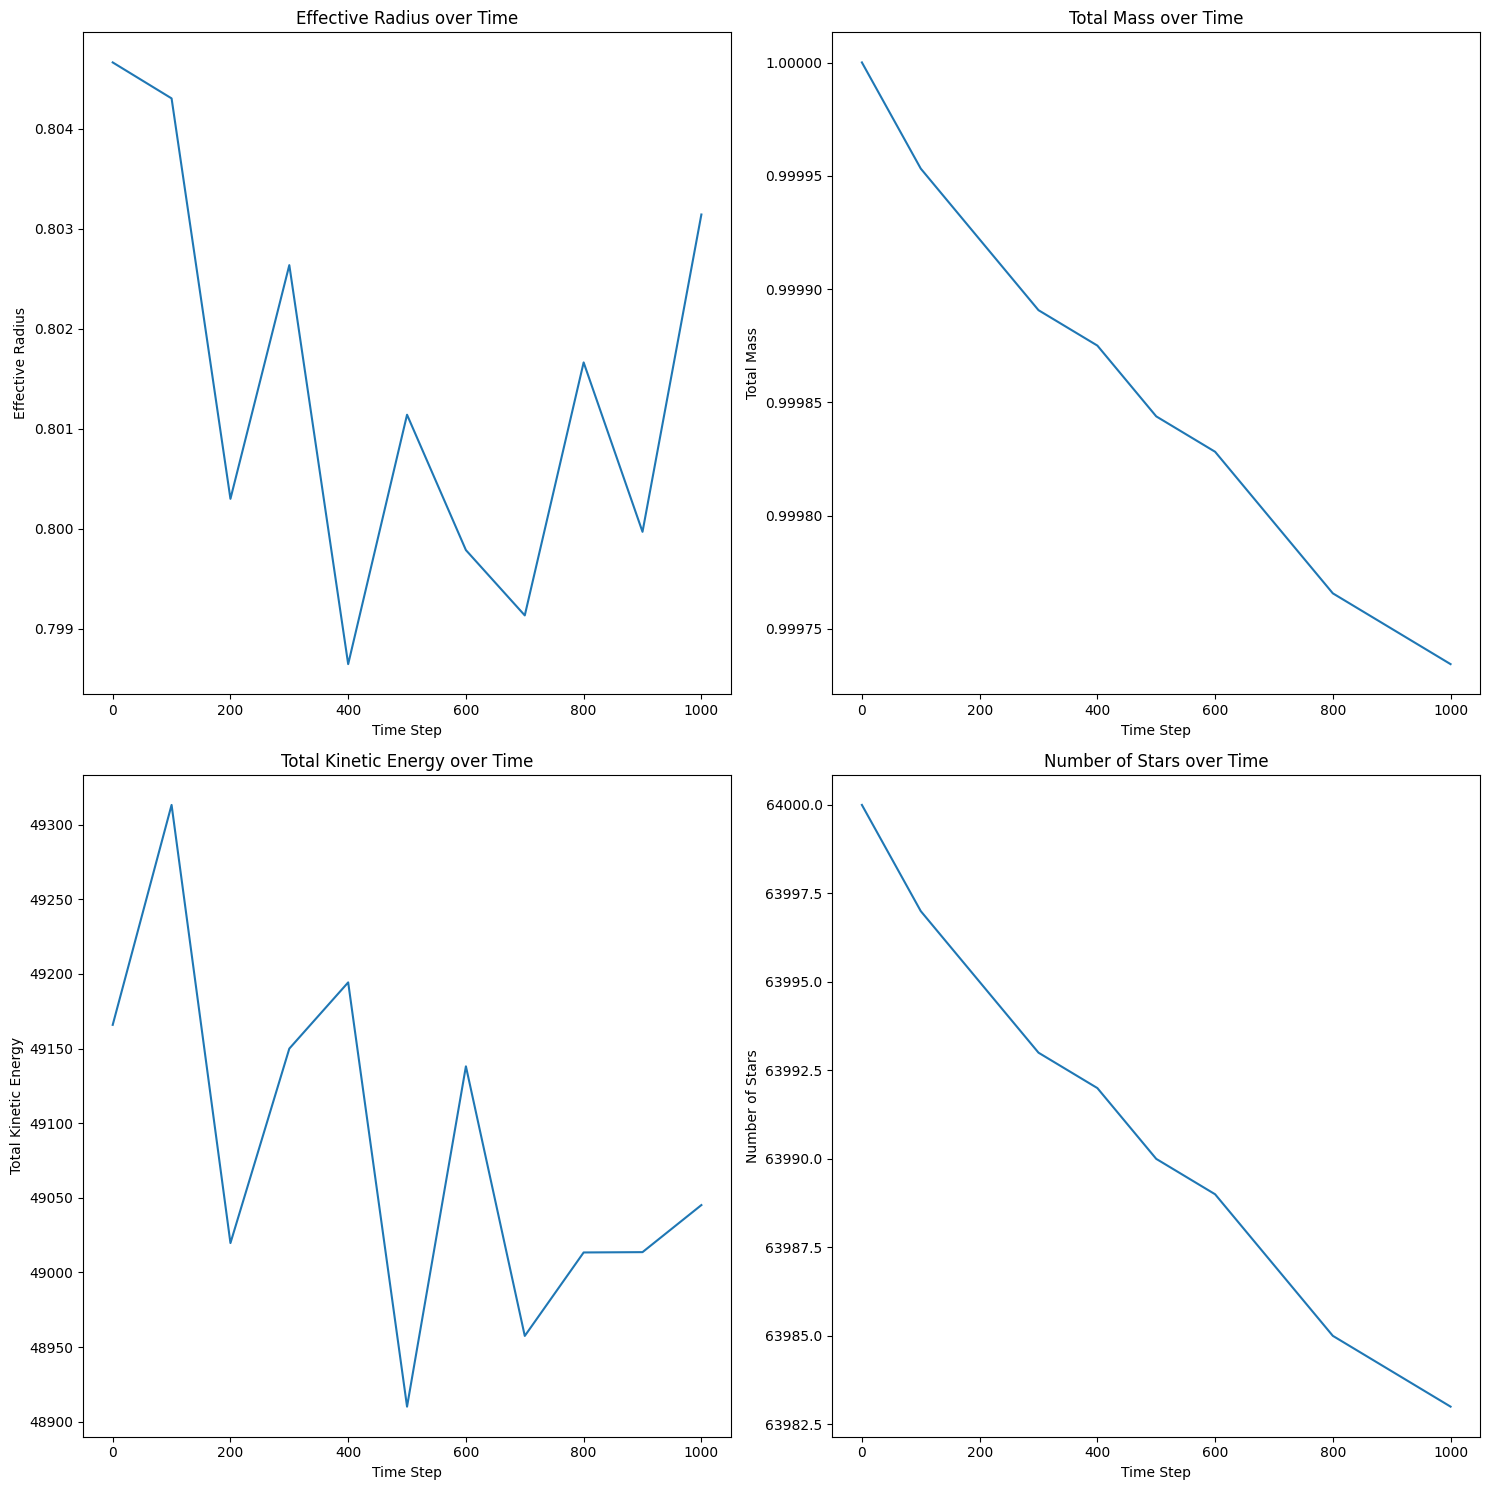

Predicting positions from t=0 to t=1000
Mean Squared Error: 1.0645
R-squared Score: -0.0582


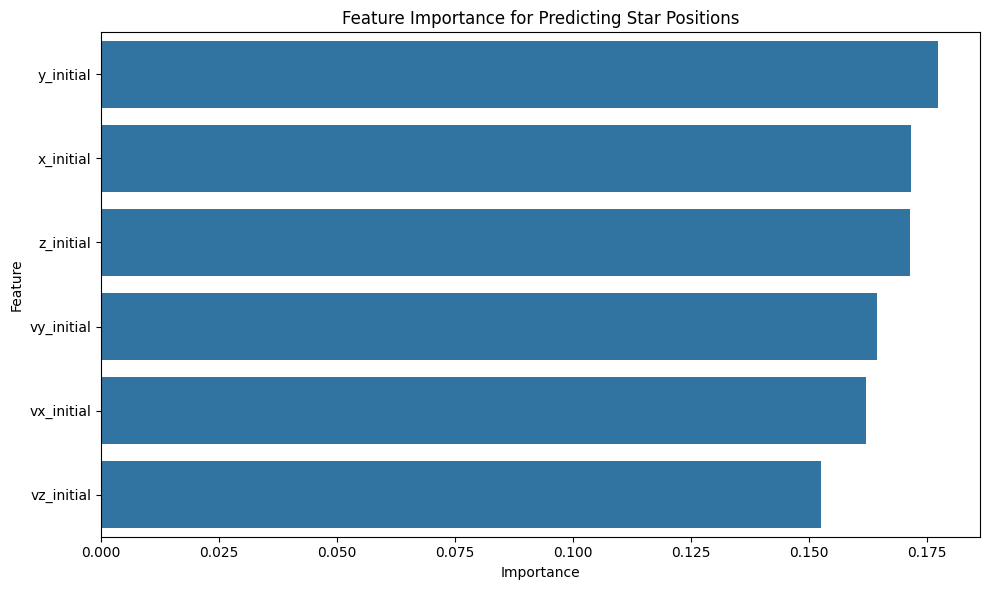

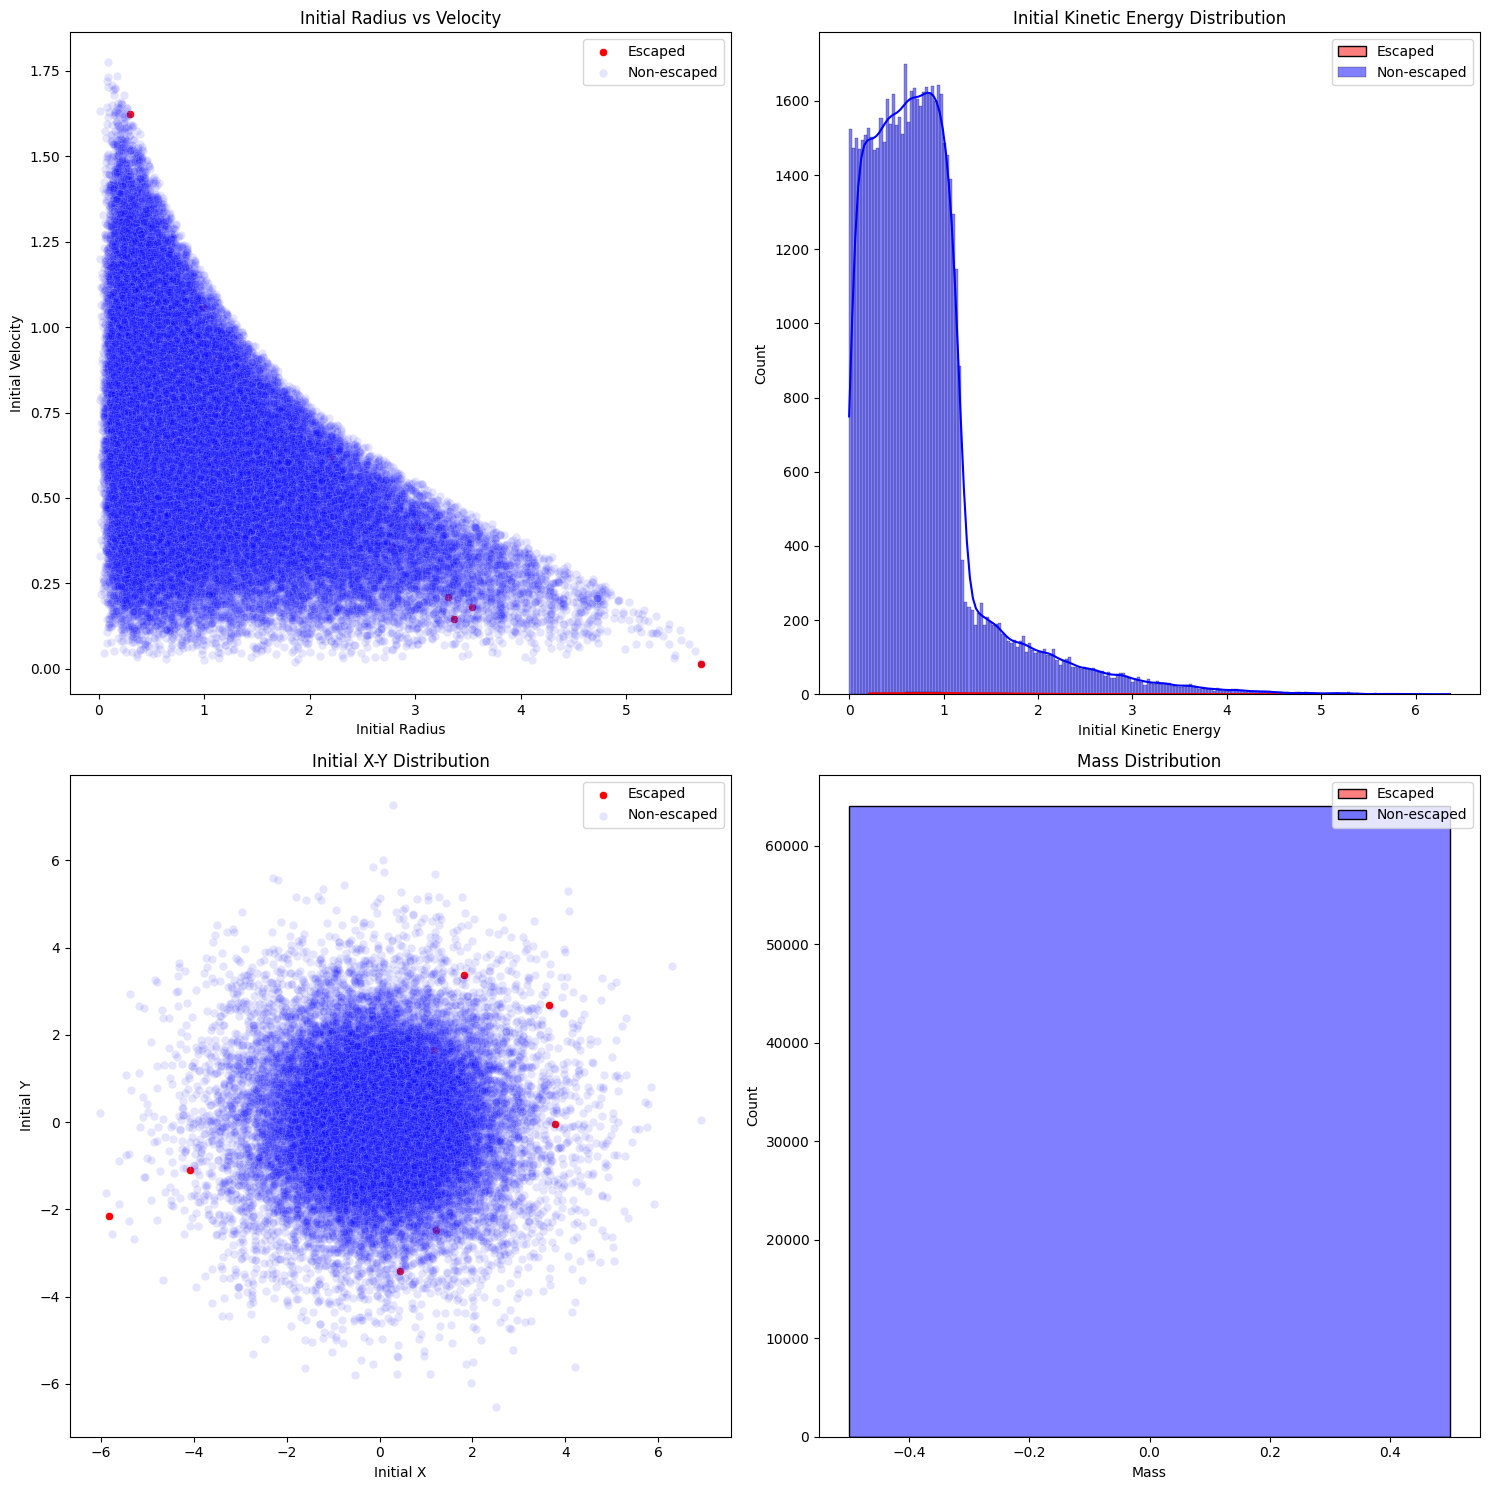

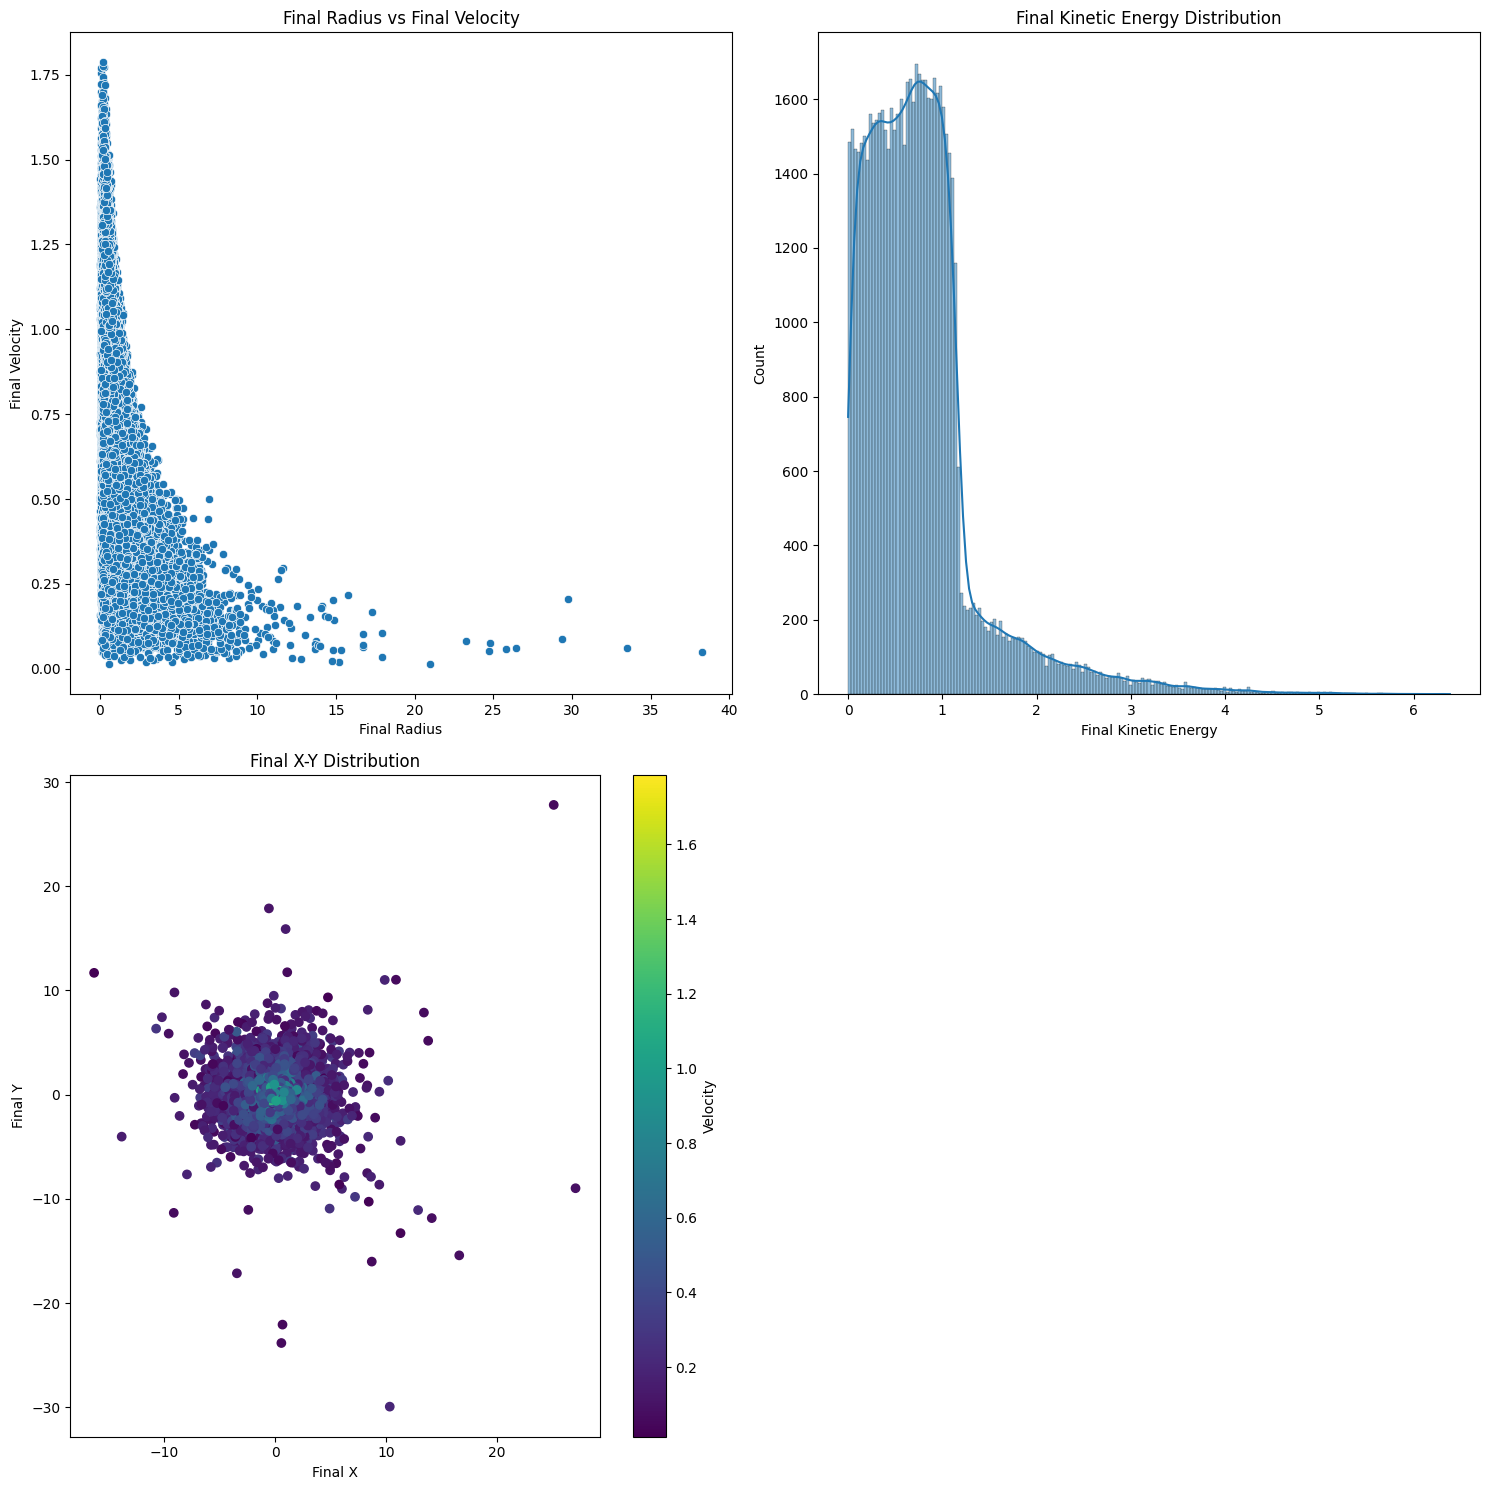

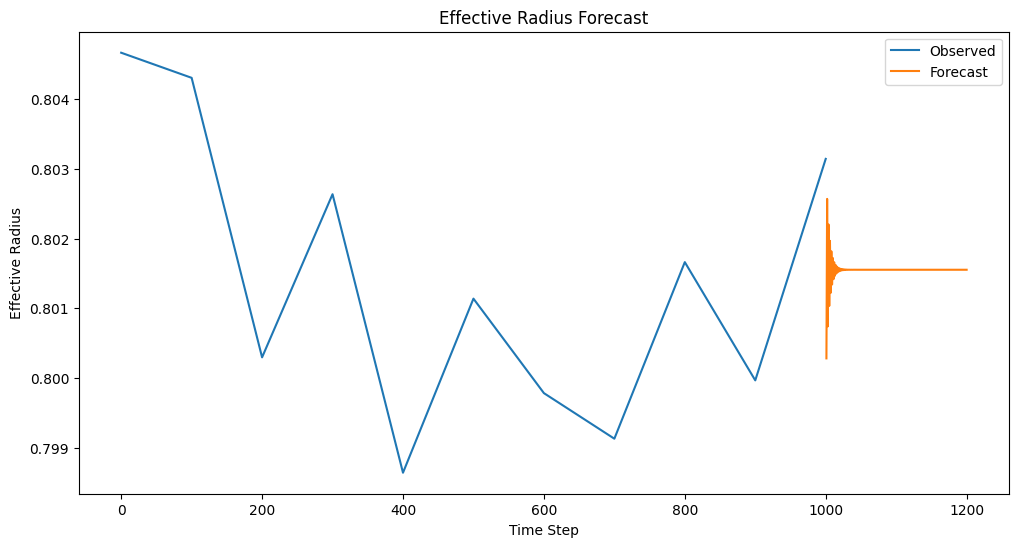

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

class StarClusterSimulationAnalysis:
    def __init__(self):
        self.data = {}
        self.scaler = StandardScaler()

    def load_data(self, file_path, time_step):
        """
        Load data from a CSV file for a specific time step.
        :param file_path: Path to the CSV file
        :param time_step: Time step of the simulation
        """
        self.data[time_step] = pd.read_csv(file_path)
        print(f"Loaded data for time step {time_step} with shape: {self.data[time_step].shape}")
        self.preprocess_data(time_step)

        # Print mean properties
        self.print_mean_properties(time_step)

    def preprocess_data(self, time_step):
        """
        Preprocessing the star cluster data for a specific time step.
        :param time_step: Time step of the simulation
        """
        df = self.data[time_step]

        # Calculating derived features
        df['r'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
        df['v'] = np.sqrt(df['vx']**2 + df['vy']**2 + df['vz']**2)
        df['kinetic_energy'] = 0.5 * df['m'] * df['v']**2

        # Normalizing numerical columns
        numerical_columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'kinetic_energy']
        df[numerical_columns] = self.scaler.fit_transform(df[numerical_columns])

        # Ensure r and v are non-negative after normalization
        df['r'] = np.abs(df['r'])
        df['v'] = np.abs(df['v'])
        df['kinetic_energy'] = np.abs(df['kinetic_energy'])

        self.data[time_step] = df

    def calculate_cluster_properties(self, time_step):
        """
        Calculate various properties of the star cluster for a specific time step.
        :param time_step: Time step of the simulation
        :return: Dictionary of cluster properties
        """
        df = self.data[time_step]

        cluster_center = df[['x', 'y', 'z']].mean()
        effective_radius = np.median(df['r'])
        total_mass = df['m'].sum()
        total_kinetic_energy = df['kinetic_energy'].sum()

        return {
            'center': cluster_center,
            'effective_radius': effective_radius,
            'total_mass': total_mass,
            'total_kinetic_energy': total_kinetic_energy,
            'num_stars': len(df)
        }

    def visualize_cluster(self, time_step):
        """
        Visualize the star cluster for a specific time step.
        :param time_step: Time step of the simulation
        """
        df = self.data[time_step]

        fig = plt.figure(figsize=(15, 5))

        # 3D scatter plot
        ax1 = fig.add_subplot(131, projection='3d')
        scatter = ax1.scatter(df['x'], df['y'], df['z'], c=df['v'], cmap='viridis', s=1)
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.set_title(f'3D Distribution (t={time_step})')
        plt.colorbar(scatter, label='Velocity')

        # Velocity distribution
        ax2 = fig.add_subplot(132)
        sns.histplot(df['v'], kde=True, ax=ax2)
        ax2.set_xlabel('Velocity')
        ax2.set_title('Velocity Distribution')

        # Radial density profile
        ax3 = fig.add_subplot(133)
        sns.histplot(df['r'], kde=True, ax=ax3)
        ax3.set_xlabel('Radius')
        ax3.set_title('Radial Density Profile')

        plt.tight_layout()
        plt.show()

    def analyze_cluster_evolution(self, time_steps):
        """
        Analyze the evolution of cluster properties over time.
        :param time_steps: List of time steps to analyze
        """
        properties = [self.calculate_cluster_properties(t) for t in time_steps]

        df_evolution = pd.DataFrame(properties, index=time_steps)

        fig, axes = plt.subplots(2, 2, figsize=(15, 15))

        sns.lineplot(x=df_evolution.index, y=df_evolution['effective_radius'], ax=axes[0, 0])
        axes[0, 0].set_title('Effective Radius over Time')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('Effective Radius')

        sns.lineplot(x=df_evolution.index, y=df_evolution['total_mass'], ax=axes[0, 1])
        axes[0, 1].set_title('Total Mass over Time')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Total Mass')

        sns.lineplot(x=df_evolution.index, y=df_evolution['total_kinetic_energy'], ax=axes[1, 0])
        axes[1, 0].set_title('Total Kinetic Energy over Time')
        axes[1, 0].set_xlabel('Time Step')
        axes[1, 0].set_ylabel('Total Kinetic Energy')

        sns.lineplot(x=df_evolution.index, y=df_evolution['num_stars'], ax=axes[1, 1])
        axes[1, 1].set_title('Number of Stars over Time')
        axes[1, 1].set_xlabel('Time Step')
        axes[1, 1].set_ylabel('Number of Stars')

        plt.tight_layout()
        plt.show()

    def predict_star_position(self, initial_time_step, final_time_step):
        """
        Predict the position of stars at a future time step based on initial conditions.
        :param initial_time_step: Initial time step
        :param final_time_step: Final time step to predict
        """
        initial_data = self.data[initial_time_step]
        final_data = self.data[final_time_step]

        # Get common stars between initial and final time steps
        common_stars = pd.merge(initial_data, final_data, on='id', suffixes=('_initial', '_final'))

        X = common_stars[['x_initial', 'y_initial', 'z_initial', 'vx_initial', 'vy_initial', 'vz_initial']]
        y = common_stars[['x_final', 'y_final', 'z_final']]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Predicting positions from t={initial_time_step} to t={final_time_step}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")

        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f"Feature Importance for Predicting Star Positions")
        plt.tight_layout()
        plt.show()

    def analyze_escaping_stars(self, initial_time_step, final_time_step):
        """
        Analyze stars that have escaped the cluster between two time steps.
        :param initial_time_step: Initial time step
        :param final_time_step: Final time step
        """
        initial_data = self.data[initial_time_step]
        final_data = self.data[final_time_step]

        escaped_stars = set(initial_data['id']) - set(final_data['id'])

        escaped_data = initial_data[initial_data['id'].isin(escaped_stars)]
        non_escaped_data = initial_data[~initial_data['id'].isin(escaped_stars)]

        fig, axes = plt.subplots(2, 2, figsize=(15, 15))

        sns.scatterplot(data=escaped_data, x='r', y='v', color='red', label='Escaped', ax=axes[0, 0])
        sns.scatterplot(data=non_escaped_data, x='r', y='v', color='blue', label='Non-escaped', ax=axes[0, 0], alpha=0.1)
        axes[0, 0].set_title('Initial Radius vs Velocity')
        axes[0, 0].set_xlabel('Initial Radius')
        axes[0, 0].set_ylabel('Initial Velocity')
        axes[0, 0].legend()

        sns.histplot(data=escaped_data, x='kinetic_energy', color='red', label='Escaped', ax=axes[0, 1], kde=True)
        sns.histplot(data=non_escaped_data, x='kinetic_energy', color='blue', label='Non-escaped', ax=axes[0, 1], kde=True)
        axes[0, 1].set_title('Initial Kinetic Energy Distribution')
        axes[0, 1].set_xlabel('Initial Kinetic Energy')
        axes[0, 1].legend()

        sns.scatterplot(data=escaped_data, x='x', y='y', color='red', label='Escaped', ax=axes[1, 0])
        sns.scatterplot(data=non_escaped_data, x='x', y='y', color='blue', label='Non-escaped', ax=axes[1, 0], alpha=0.1)
        axes[1, 0].set_title('Initial X-Y Distribution')
        axes[1, 0].set_xlabel('Initial X')
        axes[1, 0].set_ylabel('Initial Y')
        axes[1, 0].legend()

        sns.histplot(data=escaped_data, x='m', color='red', label='Escaped', ax=axes[1, 1], kde=True)
        sns.histplot(data=non_escaped_data, x='m', color='blue', label='Non-escaped', ax=axes[1, 1], kde=True)
        axes[1, 1].set_title('Mass Distribution')
        axes[1, 1].set_xlabel('Mass')
        axes[1, 1].legend()

        plt.tight_layout()
        plt.show()

    def plot_final_properties(self, final_time_step):
        """
        Plot final radius vs final velocity, final Kinetic energy distribution,
        and final X-Y distribution for a specific time step.
        :param final_time_step: Final time step of the simulation
        """
        df = self.data[final_time_step]

        fig, axes = plt.subplots(2, 2, figsize=(15, 15))

        # Final Radius vs Final Velocity
        sns.scatterplot(data=df, x='r', y='v', ax=axes[0, 0])
        axes[0, 0].set_title('Final Radius vs Final Velocity')
        axes[0, 0].set_xlabel('Final Radius')
        axes[0, 0].set_ylabel('Final Velocity')

        # Final Kinetic Energy Distribution
        sns.histplot(data=df, x='kinetic_energy', kde=True, ax=axes[0, 1])
        axes[0, 1].set_title('Final Kinetic Energy Distribution')
        axes[0, 1].set_xlabel('Final Kinetic Energy')

        # Final X-Y Distribution
        scatter = axes[1, 0].scatter(df['x'], df['y'], c=df['v'], cmap='viridis')
        axes[1, 0].set_title('Final X-Y Distribution')
        axes[1, 0].set_xlabel('Final X')
        axes[1, 0].set_ylabel('Final Y')
        plt.colorbar(scatter, ax=axes[1, 0], label='Velocity')

        # Keep the bottom-right subplot empty or use it for additional information
        axes[1, 1].axis('off')

        plt.tight_layout()
        plt.show()

    def predict_effective_radius(self, time_steps, forecast_steps):
        """
        Predict the evolution of the effective radius using ARIMA.
        :param time_steps: List of time steps to use for prediction
        :param forecast_steps: Number of steps to forecast
        """
        properties = [self.calculate_cluster_properties(t) for t in time_steps]
        effective_radius = [p['effective_radius'] for p in properties]

        model = ARIMA(effective_radius, order=(1,1,1))
        results = model.fit()

        forecast = results.forecast(steps=forecast_steps)

        plt.figure(figsize=(12, 6))
        plt.plot(time_steps, effective_radius, label='Observed')
        plt.plot(range(time_steps[-1]+1, time_steps[-1]+forecast_steps+1), forecast, label='Forecast')
        plt.xlabel('Time Step')
        plt.ylabel('Effective Radius')
        plt.title('Effective Radius Forecast')
        plt.legend()
        plt.show()

    def print_mean_properties(self, time_step):
        """
        Print mean properties of the star cluster for a specific time step.
        :param time_step: Time step of the simulation
        """
        df = self.data[time_step]

        mean_radius = df['r'].mean()
        mean_velocity = df['v'].mean()
        mean_kinetic_energy = df['kinetic_energy'].mean()
        mean_mass = df['m'].mean()

        print(f"Mean properties at time step {time_step}:")
        print(f"Mean Radius: {mean_radius:.4f}")
        print(f"Mean Velocity: {mean_velocity:.4f}")
        print(f"Mean Kinetic Energy: {mean_kinetic_energy:.4f}")
        print(f"Mean Mass: {mean_mass:.4f}")

# Example usage
if __name__ == "__main__":
    analyzer = StarClusterSimulationAnalysis()

    # Load data for multiple time steps
    for t in range(0, 1001, 100):  # Assuming we have data for t=0, 100, 200, ..., 1000
        analyzer.load_data(f'c_{t:04d}.csv', t)

    # Visualize the initial cluster
    analyzer.visualize_cluster(0)

    # Analyze cluster evolution
    analyzer.analyze_cluster_evolution(range(0, 1001, 100))

    # Predict star positions
    analyzer.predict_star_position(0, 1000)

    # Analyze escaping stars
    analyzer.analyze_escaping_stars(0, 1000)

    # Plot final properties
    analyzer.plot_final_properties(1000)

    # Predict effective radius
    analyzer.predict_effective_radius(range(0, 1001, 100), 200)